In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import calendar


In [3]:
df=pd.read_csv('/content/Uber Drives - .csv')
df.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [4]:
#Cheacking for missing values
df.isna().sum() #or use df.isnull().any() both are same


START_DATE*      0
END_DATE*        1
CATEGORY*        1
START*           1
STOP*            1
MILES*           0
PURPOSE*       503
dtype: int64

In [5]:
#Droping the missing values NOTE-myself: Don't always drop the missing values make a cope and then drop 
df=df.dropna()
df

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
5,1/6/2016 17:15,1/6/2016 17:19,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain
...,...,...,...,...,...,...,...
1150,12/31/2016 1:07,12/31/2016 1:14,Business,Kar?chi,Kar?chi,0.7,Meeting
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site


In [6]:
#checking the datatypes 
df.dtypes

START_DATE*     object
END_DATE*       object
CATEGORY*       object
START*          object
STOP*           object
MILES*         float64
PURPOSE*        object
dtype: object

In [7]:
#Changing the datatypes of Start date and End Date to datetime 
df['START_DATE*']=pd.to_datetime(df['START_DATE*'],format='%m/%d/%Y %H:%M')
df['END_DATE*']=pd.to_datetime(df['END_DATE*'],format='%m/%d/%Y %H:%M')

In [8]:
df

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
5,2016-01-06 17:15:00,2016-01-06 17:19:00,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain
...,...,...,...,...,...,...,...
1150,2016-12-31 01:07:00,2016-12-31 01:14:00,Business,Kar?chi,Kar?chi,0.7,Meeting
1151,2016-12-31 13:24:00,2016-12-31 13:42:00,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,2016-12-31 15:03:00,2016-12-31 15:38:00,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,2016-12-31 21:32:00,2016-12-31 21:50:00,Business,Katunayake,Gampaha,6.4,Temporary Site


In [9]:
df.dtypes

START_DATE*    datetime64[ns]
END_DATE*      datetime64[ns]
CATEGORY*              object
START*                 object
STOP*                  object
MILES*                float64
PURPOSE*               object
dtype: object

In [10]:
hour=[]
day=[]
dayinweek=[]
month=[]
weekday=[]

for i in df['START_DATE*']:
  hour.append(i.hour)
  day.append(i.day)
  dayinweek.append(i.dayofweek)
  month.append(i.month)
  weekday.append(calendar.day_name[dayinweek[-1]])

df["HOUR"]=hour
df['DAY']=day
df['DAYINWEEK']=dayinweek
df['MONTH']=month
df['WEEKDAY']=weekday


In [11]:
df

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,HOUR,DAY,DAYINWEEK,MONTH,WEEKDAY
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,21,1,4,1,Friday
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,20,2,5,1,Saturday
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,17,5,1,1,Tuesday
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,14,6,2,1,Wednesday
5,2016-01-06 17:15:00,2016-01-06 17:19:00,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain,17,6,2,1,Wednesday
...,...,...,...,...,...,...,...,...,...,...,...,...
1150,2016-12-31 01:07:00,2016-12-31 01:14:00,Business,Kar?chi,Kar?chi,0.7,Meeting,1,31,5,12,Saturday
1151,2016-12-31 13:24:00,2016-12-31 13:42:00,Business,Kar?chi,Unknown Location,3.9,Temporary Site,13,31,5,12,Saturday
1152,2016-12-31 15:03:00,2016-12-31 15:38:00,Business,Unknown Location,Unknown Location,16.2,Meeting,15,31,5,12,Saturday
1153,2016-12-31 21:32:00,2016-12-31 21:50:00,Business,Katunayake,Gampaha,6.4,Temporary Site,21,31,5,12,Saturday


In [12]:
#CATEGORIES WE HAVE
df['CATEGORY*'].value_counts()



Business    647
Personal      6
Name: CATEGORY*, dtype: int64

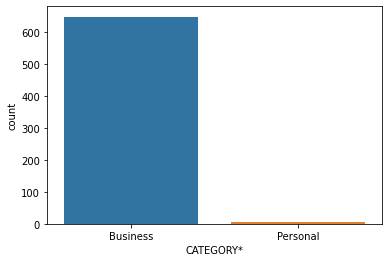

In [13]:
sns.countplot(x='CATEGORY*',data=df)

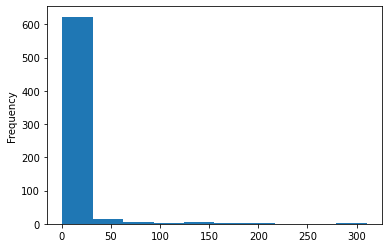

In [14]:
#HOW LONG THE PEOPLE TRAVEL # USING Histogram
df['MILES*'].plot.hist()

Text(0.5, 1.0, 'NO of trips vs hours')

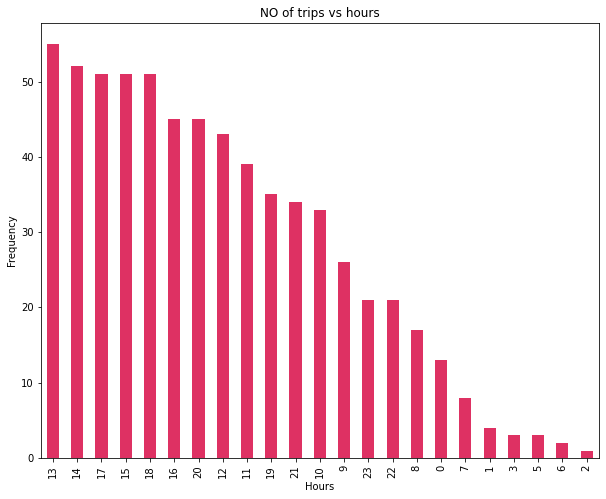

In [32]:
#HOUR OF BOOKING 
hour=df['START_DATE*'].dt.hour.value_counts()
hour.plot(kind='bar',color='#DE3163',figsize=(10,8))
plt.xlabel("Hours")
plt.ylabel("Frequency")
plt.title("NO of trips vs hours")


👆🏻👆🏻👆🏻Most People book the UBER IN AFTERNOON

## **CHECKING THE PURPOSE OF THE TRIP**

Text(0.5, 1.0, 'Purpose')

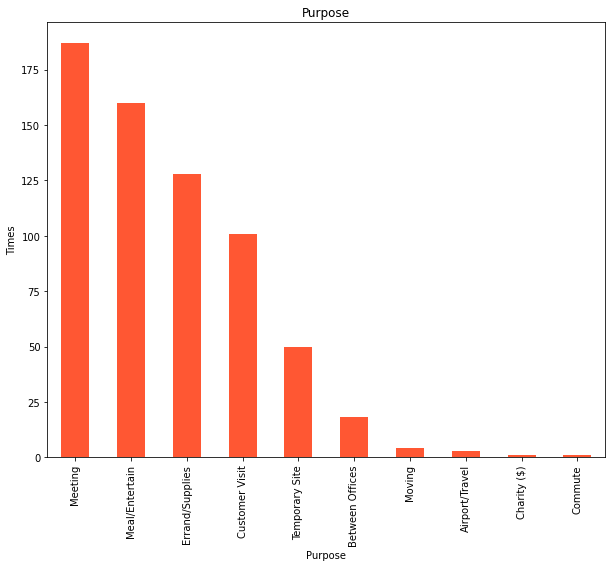

In [26]:
purpose=df['PURPOSE*'].value_counts()
purpose.plot(kind="bar",color='#FF5733',figsize=(10,8))
plt.xlabel("Purpose")
plt.ylabel("Times")
plt.title("Purpose")

👆🏻👆🏻👆🏻People who  Use Uber for Meetings and Entertainments are many

## **DAY HAS HIGHEST NUMBER OF TRIPs**

Text(0.5, 1.0, 'DAY HAS HIGHEST NUMBER OF TRIPs')

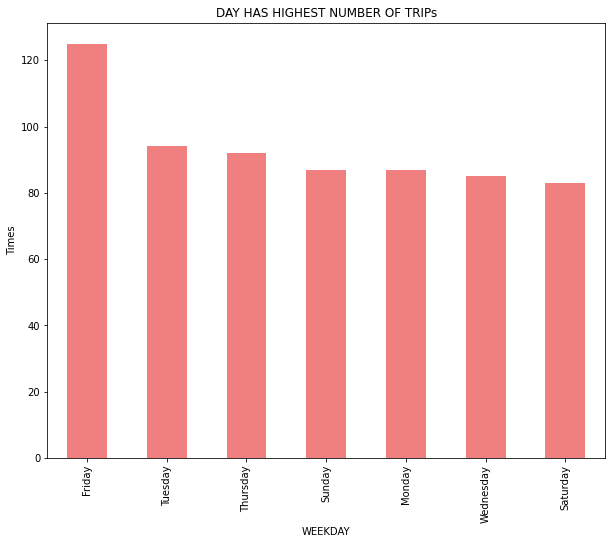

In [27]:
weekday=df['WEEKDAY'].value_counts()
weekday.plot(kind="bar",color='#F08080',figsize=(10,8))
plt.xlabel("WEEKDAY")
plt.ylabel("Times")
plt.title("DAY HAS HIGHEST NUMBER OF TRIPs")


👆🏻👆🏻👆🏻Most People Take Uber in Friday

## **NUMBER OF TRIPS FOR EACH DAY**

Text(0.5, 1.0, 'DAY HAS HIGHEST NUMBER OF TRIPs')

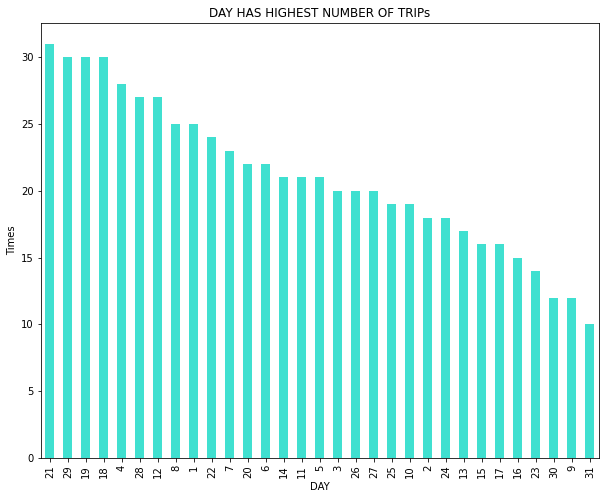

In [24]:
day=df['DAY'].value_counts()
day.plot(kind="bar",color='#40E0D0',figsize=(10,8))
plt.xlabel("DAY")
plt.ylabel("Times")
plt.title("DAY HAS HIGHEST NUMBER OF TRIPs")

👆🏻👆🏻👆🏻Most People BOOK UBER IN 21ST ,29TH, 19TH AND 18TH DAY OF THE MONTH

## **TRIPS IN DEMAND**

Text(0.5, 1.0, 'MONTH HAS HIGHEST NUMBER OF TRIPs')

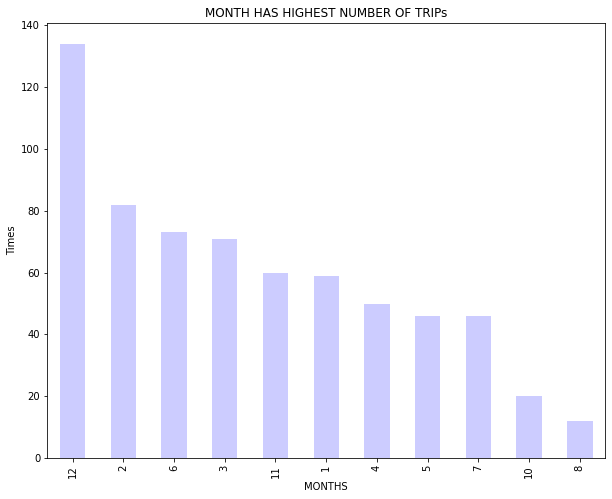

In [25]:
month=df['MONTH'].value_counts()
month.plot(kind="bar",color='#CCCCFF',figsize=(10,8))
plt.xlabel("MONTHS")
plt.ylabel("Times")
plt.title("MONTH HAS HIGHEST NUMBER OF TRIPs")

👆🏻👆🏻👆🏻Most People BOOK UBER IN 12TH(DECEMBER) MONTH OF THE YEAR

## **STARTING POINTS OF THE TRIPS**

Text(0.5, 1.0, 'MONTH HAS HIGHEST NUMBER OF TRIPs')

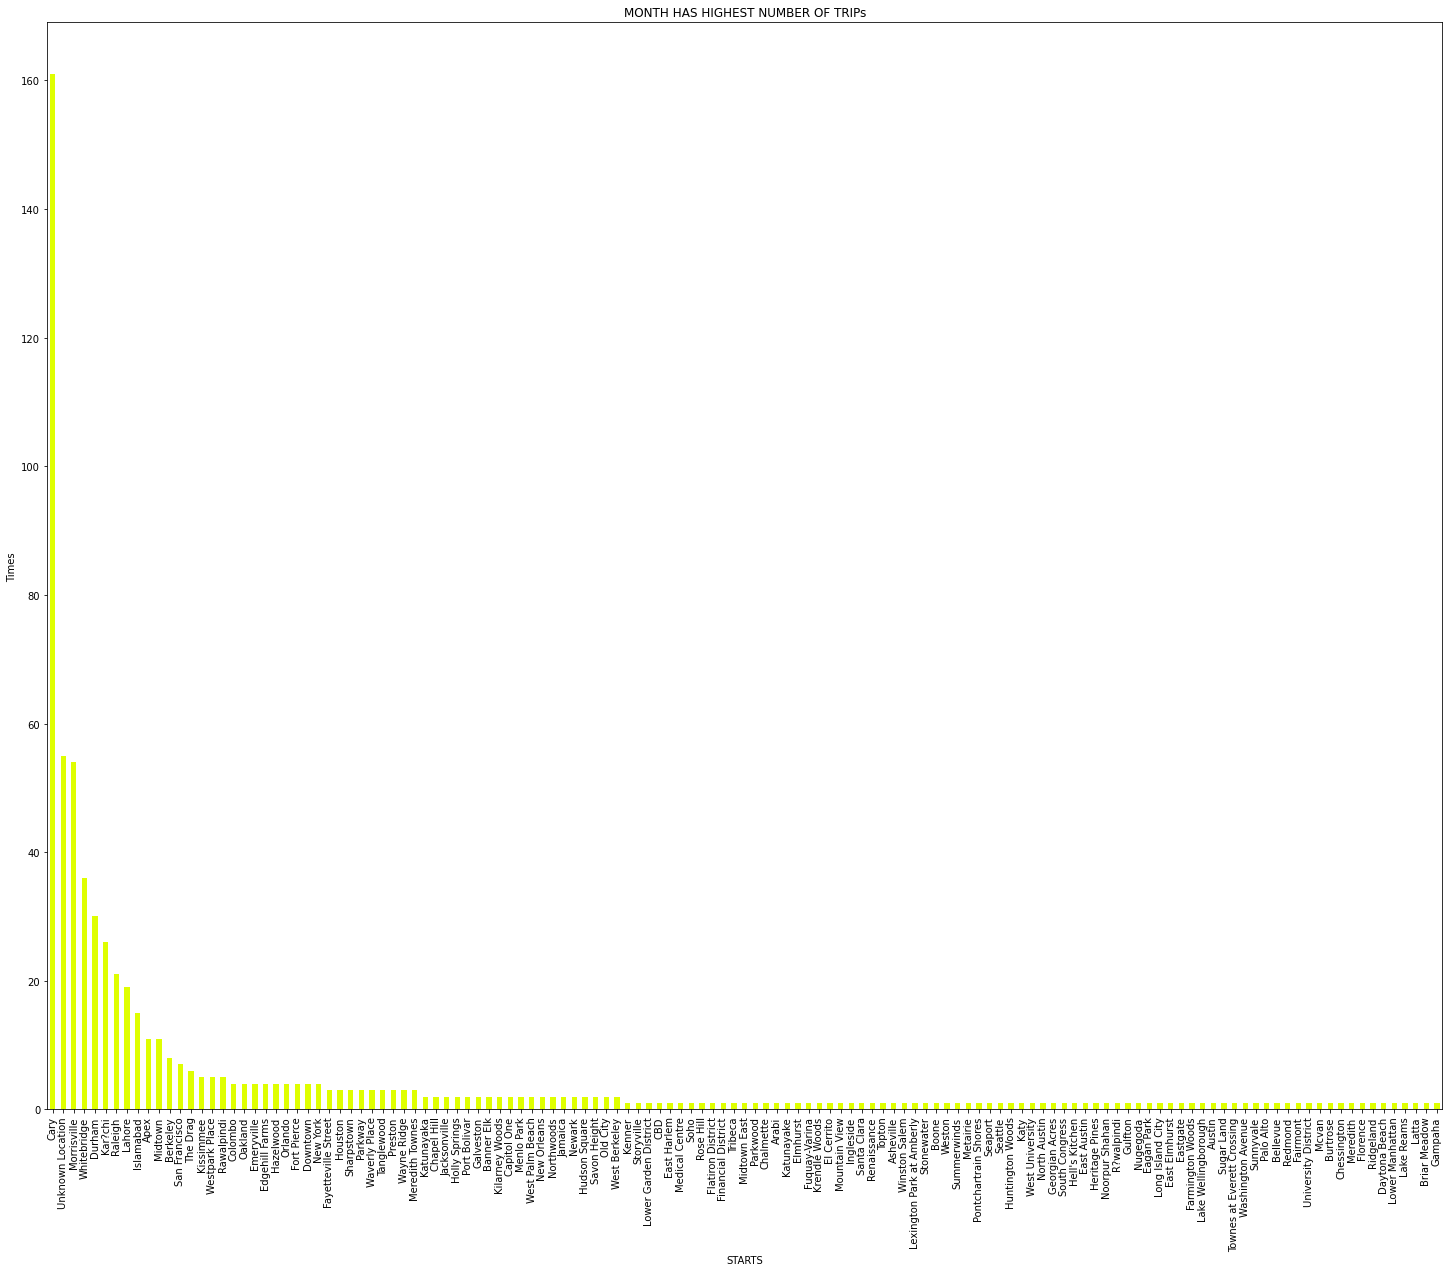

In [31]:
starting_point=df['START*'].value_counts()
starting_point.plot(kind="bar",color='#DFFF00',figsize=(25,20))
plt.xlabel("STARTS")
plt.ylabel("Times")
plt.title("MONTH HAS HIGHEST NUMBER OF TRIPs")

👆🏻👆🏻👆🏻Most People BOOK UBER IN THE LOCATION CALLED 'CARY'